In [1]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------  122.9/125.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.7 MB 3.5 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 6.1 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 5.7 MB/s eta 0:00:01
   -------------------------- ------------- 1.1/1.7 MB 6.5 MB/s eta 0:00:01
   ----------------------------------- ---- 1.5/1.7 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 5.8 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [5]:
# Load route data
route_data = pd.read_csv('route_data.csv')

In [6]:
# Create a graph from the data
G = nx.Graph()

In [7]:
route_data

,location_id,location_name,latitude,longitude
0,1,Location_A,40.7128,-74.0060
1,2,Location_B,34.0522,-118.2437
2,3,Location_C,41.8781,-87.6298
3,4,Location_D,37.7749,-122.4194
4,5,Location_E,51.5074,-0.1278
5,6,Location_F,35.6895,139.6917
6,7,Location_G,-33.8688,151.2093
7,8,Location_H,55.7558,37.6176
8,9,Location_I,-22.9083,-43.1964
9,10,Location_J,-33.9258,18.4232


In [8]:
# Add nodes to the graph
for index, row in route_data.iterrows():
    G.add_node(row['location_id'], pos=(row['latitude'], row['longitude']))

In [9]:
# Add edges with distances as attributes
for i in range(len(route_data)):
    for j in range(i + 1, len(route_data)):
        loc1 = route_data.iloc[i]
        loc2 = route_data.iloc[j]
        distance = geodesic((loc1['latitude'], loc1['longitude']), (loc2['latitude'], loc2['longitude'])).miles
        G.add_edge(loc1['location_id'], loc2['location_id'], distance=distance)

In [10]:
# Solve the Travelling Salesman Problem
tsp_path = nx.approximation.traveling_salesman_problem(G, cycle=True)

In [11]:
# Extract optimized route data
optimized_route_data = route_data[route_data['location_id'].isin(tsp_path)]

In [12]:
# Display the optimized route
print("Optimized Route:")
print(optimized_route_data[['location_id', 'location_name', 'latitude', 'longitude']])

Optimized Route:
   location_id location_name  latitude  longitude
0            1    Location_A   40.7128   -74.0060
1            2    Location_B   34.0522  -118.2437
2            3    Location_C   41.8781   -87.6298
3            4    Location_D   37.7749  -122.4194
4            5    Location_E   51.5074    -0.1278
5            6    Location_F   35.6895   139.6917
6            7    Location_G  -33.8688   151.2093
7            8    Location_H   55.7558    37.6176
8            9    Location_I  -22.9083   -43.1964
9           10    Location_J  -33.9258    18.4232


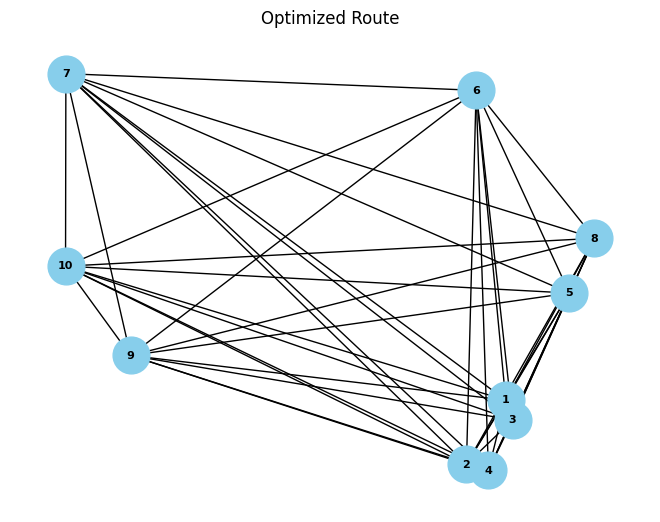

In [13]:
# Plot the optimized route
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8)
plt.title('Optimized Route')
plt.show()